I solve the integral

$\int_{0}^{+\infty} x^3 exp\left( -\frac{x^2}{2\sigma^2}\right) dx = 2\sigma^4$

using Monte Carlo integration.

I notice that if I write the integral as

$\int_{0}^{+\infty} x^3 exp\left( -\frac{x^2}{2\sigma^2}\right) dx = \frac{\sqrt{2\pi}\sigma}{2} \int_{0}^{+\infty} x^3 \frac{2}{\sqrt{2\pi}\sigma} exp\left( -\frac{x^2}{2\sigma^2}\right) dx$

I obtain the form

$\int_{0}^{+\infty} x^3 p(x) dx$

where $p(x) = \frac{2}{\sqrt{2\pi}\sigma} exp\left( -\frac{x^2}{2\sigma^2}\right)$ and $\int_{0}^{+\infty} p(x) dx = 1$.

Thus I can approximate the solution of the integral with

$\frac{\sqrt{2\pi}\sigma}{2} \int_{0}^{+\infty} x^3 p(x) dx \approx \frac{\sqrt{2\pi}\sigma}{2} \frac{1}{N}\sum_{i=1}^N x_i^3$

In [15]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os

In [16]:
# At first I perform Monte Carlo integtration with N=10000 samples
mu = 0
sigma = 1
N = 10000

# I generate points from the half-gaussian (I take the absolute value of samples generated by a gaussian)
xi = abs(np.random.normal(mu, sigma, N))

def fun(x):
    return x**3

integral = sigma*np.sqrt(np.pi/2) * np.mean(fun(xi))
known_result = 2*sigma**4
error = np.abs(integral-known_result)/known_result
print('Monte Carlo integration = ', integral)
print('Known result = ', known_result)
print('Absolute error = ', error)

Monte Carlo integration =  1.932398716026913
Known result =  2
Absolute error =  0.033800641986543534


I perform Monte Carlo integration varying N

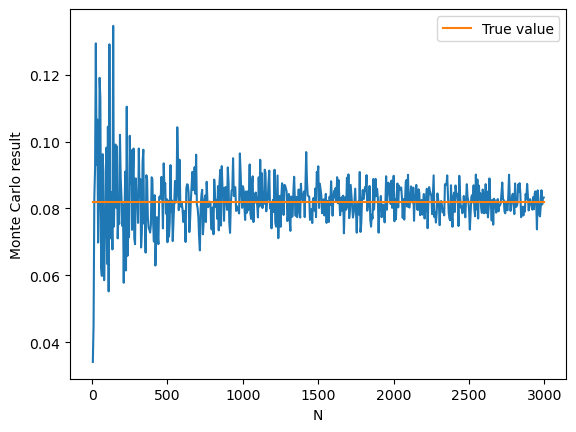

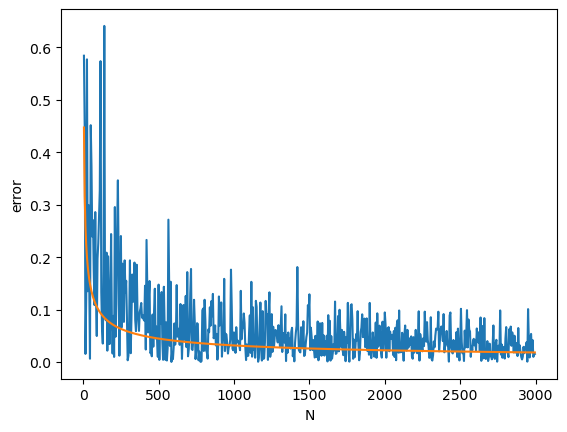

In [17]:
mu = 0
sigma = 0.45
known_result = 2*sigma**4
N_min = 5
N_max = 3000
N_values = np.arange(N_min, N_max, 5)
integral_array = []
error_array = []

for i in N_values:

    xi = abs(np.random.normal(mu, sigma, i))

    integral = sigma*np.sqrt(np.pi/2) * np.mean(fun(xi))
    integral_array.append(integral)
    error = np.abs(integral-known_result)/known_result
    error_array.append(error)

plt.plot(N_values, integral_array)
line = known_result*np.ones(len(N_values))
plt.plot(N_values, line, label='True value')
plt.xlabel('N')
plt.ylabel('Monte Carlo result')
plt.legend()
plt.show()

plt.plot(N_values, error_array)
plt.plot(N_values, 1/np.sqrt(N_values))
plt.xlabel('N')
plt.ylabel('error')
plt.show()

I notice that the error is proportional to $\frac{1}{\sqrt{N}}$.

What is the distribution of my results?
(I choose N=2000)

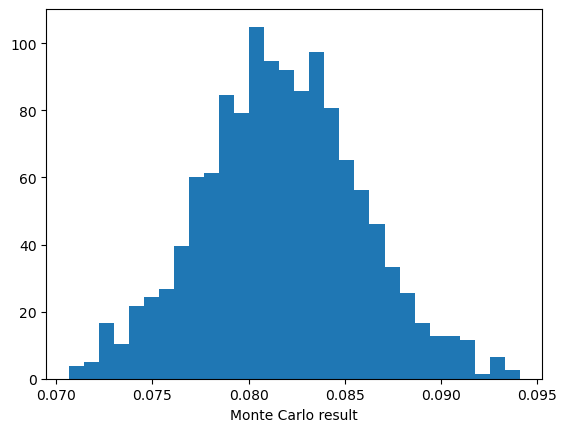

In [18]:
mu = 0
sigma = 0.45
known_result = 2*sigma**4
N = 2000
integral_array = []
for i in range (1000):
    xi = abs(np.random.normal(mu, sigma, N))

    integral = sigma*np.sqrt(np.pi/2) * np.mean(fun(xi))
    integral_array.append(integral)

plt.hist(integral_array, density=True, bins=30)  
plt.xlabel('Monte Carlo result') 
plt.show() 

This distribution is gaussian.

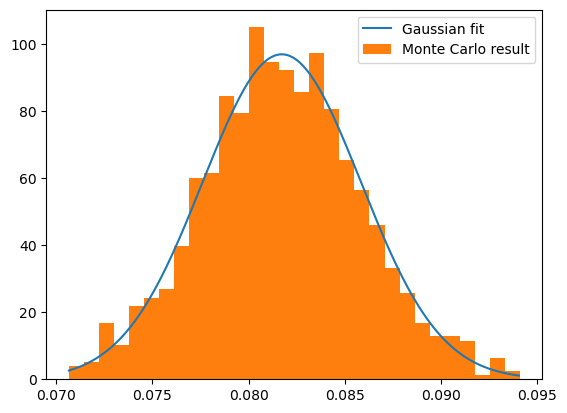

In [19]:
#plotting the gaussian over the histogram
def gaussian(x , mean , std):
    prob_density = 1/np.sqrt(2*np.pi*std**2) * np.exp(-0.5*((x-mean)/std)**2)
    return prob_density

integral_array = np.array(integral_array)
mean = np.average(integral_array)
std_dev = np.std(integral_array)
x = np.arange(integral_array.min(), integral_array.max(), 0.0001)
x_array = np.array(x)
y= []
for i in range (len(x_array)):
    y.append(gaussian(x_array[i], mean, std_dev))

plt.plot(x, y, label='Gaussian fit')
plt.hist(integral_array, density=True, bins=30, label='Monte Carlo result')
plt.legend()
plt.show()

I analyze how the distribution changes increasing N.

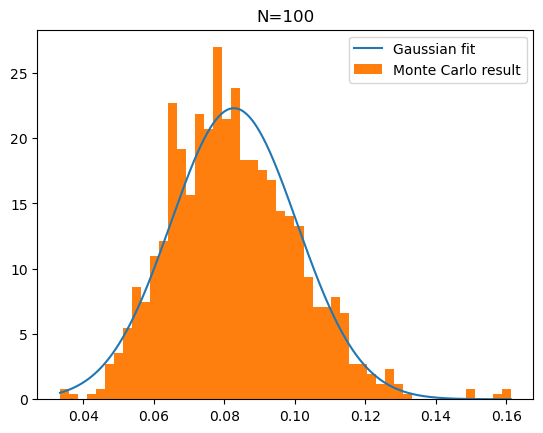

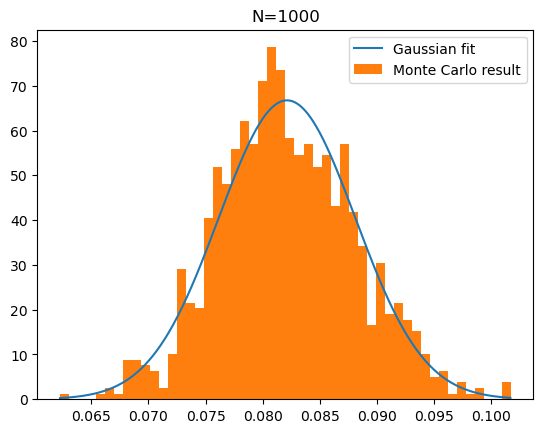

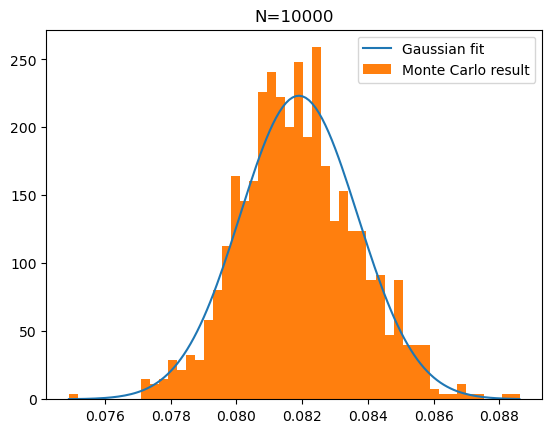

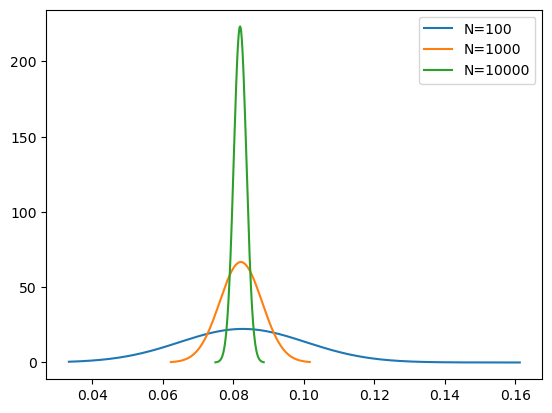

In [20]:
#changing N
x_axis = []
y_axis = []
N_plot = []

N = 100
N_plot.append(N)
integral_array = []
for i in range (1000):
    xi = abs(np.random.normal(mu, sigma, N))

    integral = sigma*np.sqrt(np.pi/2) * np.mean(fun(xi))
    integral_array.append(integral)

integral_array = np.array(integral_array)
mean = np.average(integral_array)
std_dev = np.std(integral_array)
x = np.arange(integral_array.min(), integral_array.max(), 0.0001)
x_array = np.array(x)
y= []
for i in range (len(x_array)):
    y.append(gaussian(x_array[i], mean, std_dev))

x_axis.append(x)
y_axis.append(y)
plt.plot(x, y, label='Gaussian fit')
plt.hist(integral_array, density=True, bins=50, label='Monte Carlo result')
plt.title('N=%i' %N)
plt.legend()
plt.show()


N = 1000
N_plot.append(N)
integral_array = []
for i in range (1000):
    xi = abs(np.random.normal(mu, sigma, N))

    integral = sigma*np.sqrt(np.pi/2) * np.mean(fun(xi))
    integral_array.append(integral)

integral_array = np.array(integral_array)
mean = np.average(integral_array)
std_dev = np.std(integral_array)
x = np.arange(integral_array.min(), integral_array.max(), 0.0001)
x_array = np.array(x)
y= []
for i in range (len(x_array)):
    y.append(gaussian(x_array[i], mean, std_dev))

x_axis.append(x)
y_axis.append(y)
plt.plot(x, y, label='Gaussian fit')
plt.hist(integral_array, density=True, bins=50, label='Monte Carlo result')
plt.title('N=%i' %N)
plt.legend()
plt.show()


N = 10000
N_plot.append(N)
integral_array = []
for i in range (1000):
    xi = abs(np.random.normal(mu, sigma, N))

    integral = sigma*np.sqrt(np.pi/2) * np.mean(fun(xi))
    integral_array.append(integral)

integral_array = np.array(integral_array)
mean = np.average(integral_array)
std_dev = np.std(integral_array)
x = np.arange(integral_array.min(), integral_array.max(), 0.0001)
x_array = np.array(x)
y= []
for i in range (len(x_array)):
    y.append(gaussian(x_array[i], mean, std_dev))

x_axis.append(x)
y_axis.append(y)
plt.plot(x, y, label='Gaussian fit')
plt.hist(integral_array, density=True, bins=50, label='Monte Carlo result')
plt.title('N=%i' %N)
plt.legend()
plt.show()


plt.plot(x_axis[0], y_axis[0], label='N=%i' %N_plot[0])
plt.plot(x_axis[1], y_axis[1], label='N=%i' %N_plot[1])
plt.plot(x_axis[2], y_axis[2], label='N=%i' %N_plot[2])
plt.legend()
plt.show()

I notice that as N increases, the Gaussian gets narrower (the standard deviation is proportional to 1/$\sqrt{N}$).